<a href="https://colab.research.google.com/github/VadymBoyko/DS-HW01/blob/main/Hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
# Прочитайте csv файл (використовуйте функцію read_csv)
# Виведіть перші п'ять рядків (використовується функція head)
# Виведіть розміри датасету (використовуйте атрибут shape)
df = pd.read_csv("/content/bestsellers with categories.csv")

(550, 7)

In [6]:
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [7]:
df.shape

(550, 7)

Про скільки книг зберігає дані датасет? **Відповідь: 550**

In [9]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


**ГРАФІКИ**

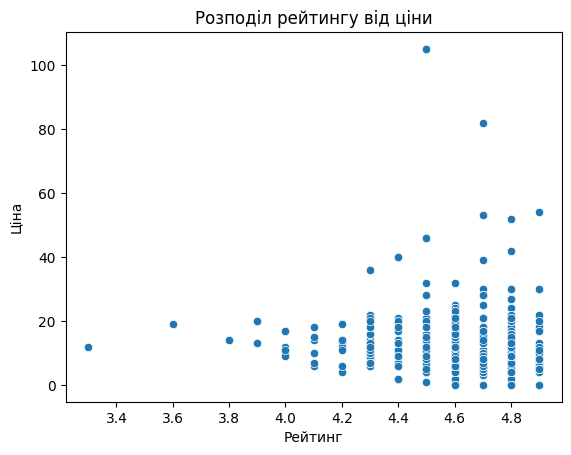

In [62]:
# графік розподілу рейтингу від ціни
sns.scatterplot(data=df, x='user_rating', y='price')
plt.xlabel('Рейтинг')
plt.ylabel('Ціна')
plt.title('Розподіл рейтингу від ціни')
plt.show()

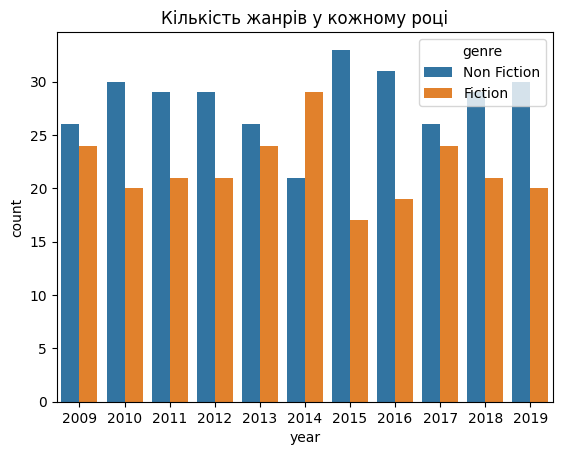

In [63]:
sns.countplot(data=df, x='year', hue='genre')
plt.title('Кількість жанрів у кожному році')
plt.show()

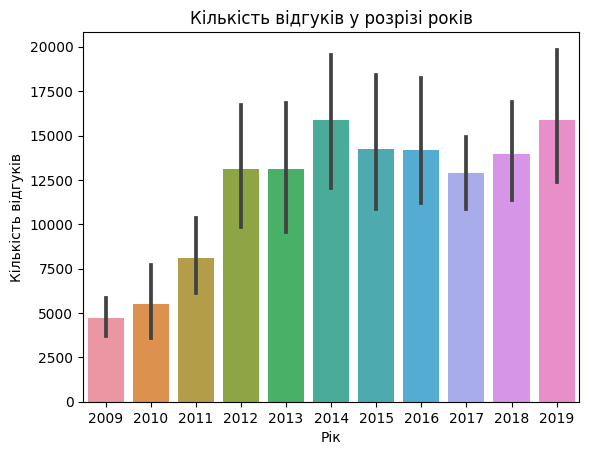

In [64]:
sns.barplot(data=df, x='year', y='reviews')
plt.xlabel('Рік')
plt.ylabel('Кількість відгуків')
plt.title('Кількість відгуків у розрізі років')
plt.show()

In [10]:
#Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски? (Так / ні) **Відповідь: ні, пропусків немає**

In [12]:
#Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри? **Відповідь: 'Non Fiction', 'Fiction'**

<Axes: ylabel='Frequency'>

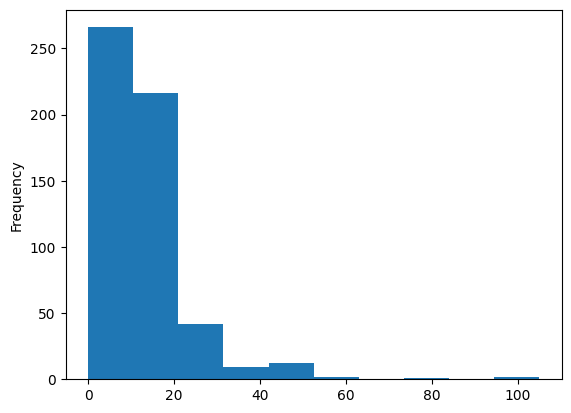

In [65]:
#Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
df['price'].plot(kind='hist')

In [14]:
#Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
df['price'].describe()

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: price, dtype: float64

Максимальна ціна? **Відповідь: 105**

Мінімальна ціна? **Відповідь: 0**

Середня ціна? **Відповідь: 13.1**

Медіанна ціна? **Відповідь: 11** (50%       11.000000)


**Пошук та сортування даних**

In [15]:
df['user_rating'].max()

4.9

Який рейтинг у датасеті найвищий? **Відповідь: 4.9**

In [16]:
sum(df['user_rating'] == 4.9)

52

Скільки книг мають такий рейтинг? **Відповідь: 52**

In [18]:
df.loc[df['reviews'].idxmax()]

name           Where the Crawdads Sing
author                     Delia Owens
user_rating                        4.8
reviews                          87841
price                               15
year                              2019
genre                          Fiction
Name: 534, dtype: object

Яка книга має найбільше відгуків? **Відповідь: Where the Crawdads Sing**
Дана книга має 87841 відгуків

In [19]:
#З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? 
df[df['year']==2015].sort_values('price', ascending=False).head(1)

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


**Відповідь: Publication Manual of the American Psychologic...**	American Psychological Association

Price is 46

In [21]:
#Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?
len(df[(df['genre'] == 'Fiction') & (df['year'] == 2010)])

20

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?**Відповідь: 20**

In [22]:
#Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?
len(df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))])

1

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? **Відповідь: 1**

In [24]:
#І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
df[(df['year'] == 2015) & (df['price'] < 8)].sort_values('price', ascending=True).iloc[-1]

name           Old School (Diary of a Wimpy Kid #10)
author                                   Jeff Kinney
user_rating                                      4.8
reviews                                         6169
price                                              7
year                                            2015
genre                                        Fiction
Name: 253, dtype: object

Яка книга остання у відсортованому списку? **Відповідь: Old School (Diary of a Wimpy Kid #10)**

**Агрегування даних та з'єднання таблиць**

In [25]:
df.groupby('genre').agg({'price':['min', 'max']})

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

Максимальна ціна для жанру Fiction: **Відповідь 82**

Мінімальна ціна для жанру Fiction: **Відповідь 0**

Максимальна ціна для жанру Non Fiction: **Відповідь 105**

Мінімальна ціна для жанру Non Fiction: **Відповідь 0**

In [40]:
#Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count).
#Не беріть усі стовпці, виберете тільки потрібні
df_author=df.groupby('author').agg(books_count=('name', 'count'))
df_author

,books_count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


Якої розмірності вийшла таблиця? **Відповідь: 248**

In [46]:
df_author.sort_values('books_count', ascending=False).head(1)

,books_count
author,
Jeff Kinney,12


Який автор має найбільше книг? **Відповідь: Jeff Kinney**

Скільки книг цього автора? **Відповідь: 12**

In [48]:
#Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg,
# для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні
df_author_rate=df.groupby('author').agg({'user_rating':'mean'})
df_author_rate.sort_values('user_rating', ascending=True).head(1)

,user_rating
author,
Donna Tartt,3.9


У якого автора середній рейтинг мінімальний? **Відповідь: Donna Tartt** 

Який у цього автора середній рейтинг? **Відповідь: 3.9**

In [49]:
#З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1).
#Збережіть результат у змінну
df_concat_authors = pd.concat([df_author,df_author_rate], axis=1)
df_concat_authors

,books_count,user_rating
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


In [50]:
#Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
df_concat_authors.sort_values(by=['books_count', 'user_rating'], ascending=True)

,books_count,user_rating
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


Який автор перший у списку? **Відповідь: Muriel Barbery	1	4.000000**
